<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

#### Pantea Amoie 
#### Student Number : 400101656

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

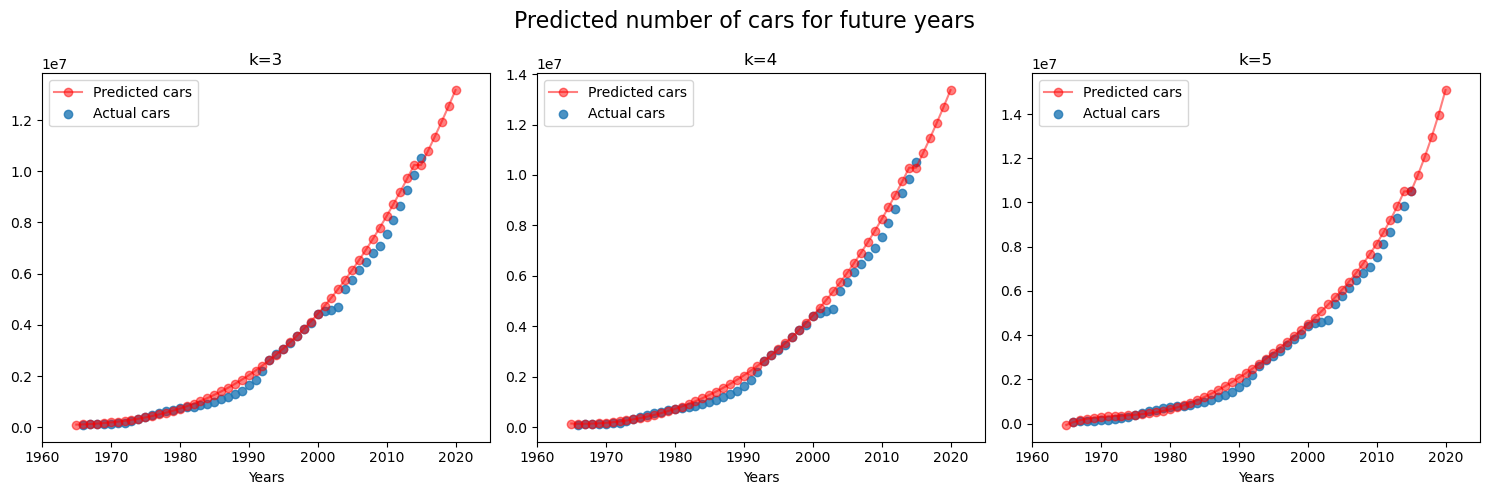

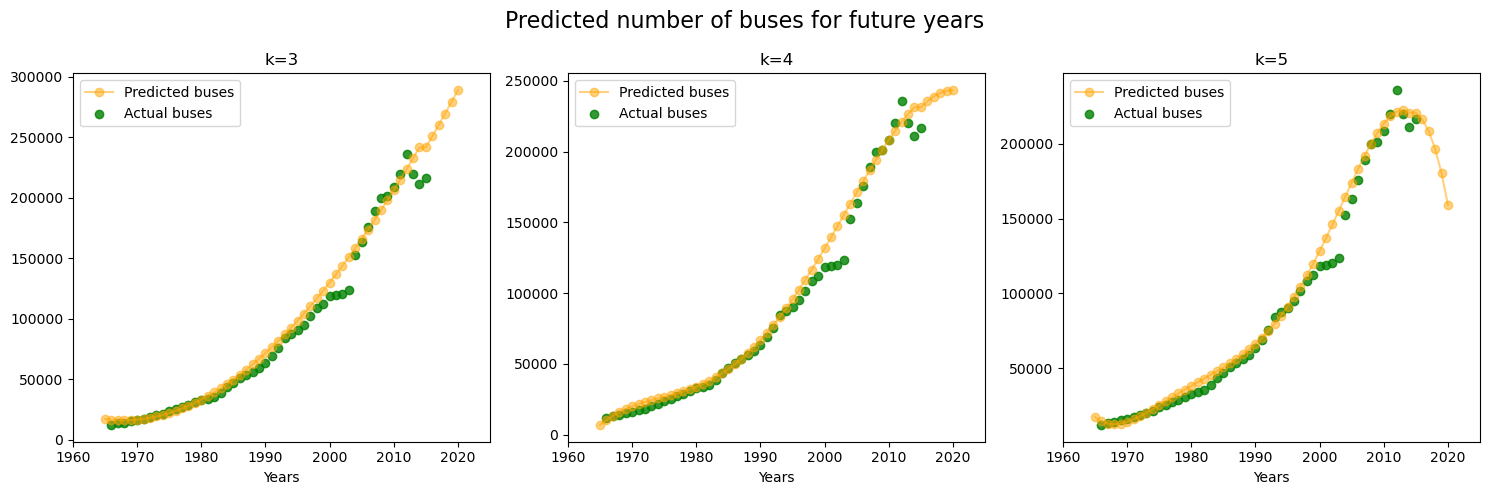

In [2]:
data = pd.read_csv("arac.csv")
years = np.zeros(50)
cars = np.zeros(50)
buses = np.zeros(50)

fix_year = 1965
# extract the data about years, cars, and buses from the file
for c in range(50):
    numbers = data.iloc[c, 0].split(';')
    years[c] = int(numbers[0]) - fix_year
    cars[c] = int(numbers[2])  
    buses[c] = int(numbers[4])  

years_hat = np.arange(1965, 2021) - fix_year

fig = plt.figure(figsize=(15, 5))

for k in range(3, 6):
    # create the Vandermonde matrix (n x k)
    n = 50
    # the vandermonde matrix used for finding xLS
    v = np.zeros((n, k+1))
    # the vandermonde matrix used for finding y^'s
    v2 = np.zeros((56, k+1))
    for i in range(56):
        for j in range(k+1):
            if i<50:
                v[i, j] = years[i] ** j
                v2[i, j] = v[i, j]
            else:
                v2[i, j] = years_hat[i] ** j
    
    # find xLS
    cars_w = np.dot(np.linalg.inv(np.dot(v.transpose(), v)), np.dot(v.transpose(), cars))
    # find y^'s
    cars_yhat = np.dot(v2, cars_w)
    
    plt.subplot(1, 3, k - 2)
    plt.plot(years_hat + fix_year, cars_yhat, marker='o', color='r', alpha=0.5, label='Predicted cars')
    plt.scatter(years + fix_year, cars, alpha=0.8, label='Actual cars')
    plt.title("k=" + str(k))
    plt.xlabel('Years')
    plt.xlim(1960, 2025)
    plt.legend()
    fig.suptitle('Predicted number of cars for future years', fontsize=16)
plt.tight_layout()
plt.show()


fig2 = plt.figure(figsize=(15, 5))
for k in range(3, 6):
    # create the Vandermonde matrix (n x k)
    n = 50
    # the vandermonde matrix used for finding xLS
    v = np.zeros((n, k+1))
    # the vandermonde matrix used for finding y^'s
    v2 = np.zeros((56, k+1))
    for i in range(56):
        for j in range(k+1):
            if i<50:
                v[i, j] = years[i] ** j
                v2[i, j] = v[i, j]
            else:
                v2[i, j] = years_hat[i] ** j
    
    # find xLS
    buses_w = np.dot(np.linalg.inv(np.dot(v.transpose(), v)), np.dot(v.transpose(), buses))
    # find y^'s
    buses_yhat = np.dot(v2, buses_w)
    
    plt.subplot(1, 3, k - 2)
    plt.plot(years_hat + fix_year, buses_yhat, marker='o', color='orange', alpha=0.5, label='Predicted buses')
    plt.scatter(years + fix_year, buses, alpha=0.8, label='Actual buses', color='g')
    plt.title("k=" + str(k))
    plt.xlabel('Years')
    plt.xlim(1960, 2025)
    plt.legend()
    fig2.suptitle('Predicted number of buses for future years', fontsize=16)
plt.tight_layout()
plt.show()

## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [3]:
def load_data(file_name):
    im = pd.read_csv(file_name, header=None)
    X = np.zeros((600, 2))
    for i in range(600):
        X[i] = im[0][i], im[1][i]
    return X

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [4]:
def kmeans(X, k):

    n, d = X.shape
    # randomly choose centroids(M:k*d)
    M = X[np.random.choice(n, k, replace=False)]
    # cluster assignment matrix U
    U = np.zeros((n, k))
    
    last_error = 0
    out = False
    # assign the data points to corresponding centroids:
    while True:
        # assign data points to the nearest cluster centroids
        for i in range(n):
            distances = np.sum((M - X[i])**2, axis=1)
            nearest_cluster = np.argmin(distances)
            for j in range(k):
                if j == nearest_cluster:
                    U[i, j] = 1
                else:
                    U[i, j] = 0
        # update the cluster centroids as the mean of the assigned data points
        for j in range(k):
            assigned_points = X[U[:, j] == 1]
            if len(assigned_points) > 0:
                M[j, :] = np.mean(assigned_points, axis=0)

        # check for convergence, which means that the total squared error between the data points and their closest(=assigned)
        # cluster centroids does not change
        err_matrix = np.sum((X[:, None] - M)**2, axis=2)
        error = np.sum(np.min(err_matrix, axis=1))
        if out == True and error == last_error:
            break
        # update the error
        last_error = error
        out = True
        
    return M, U

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [5]:
def plot_clusters(X, M, U):
    
    k, d = M.shape
    assigned_points = []
    # for each cluster, find the data points corresponding to it and plot them
    for i in range(k):
        assigned_points = X[U[:, i] == 1]
        plt.scatter(assigned_points[:, 0], assigned_points[:, 1], label="cluster"+str(i+1) , marker='o')
        
    # mark the centroids and draw a circle around each of them
    for i in range(k):
        plt.scatter(M[i, 0], M[i, 1], label="centroid"+str(i+1) , marker='x', s=100)
        circle = plt.Circle((M[i, 0], M[i, 1]), radius=0.5, color='black', fill=False)
        plt.gca().add_patch(circle)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

**<font color="red"> Don't edit the code in the following cell!</font>**

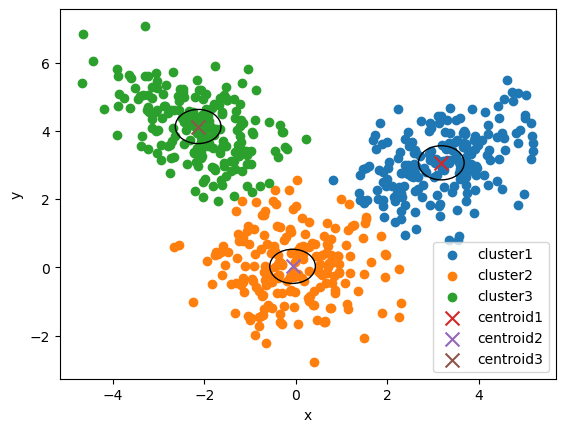

In [6]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

The points are from 3 different distributions, as it was also mentioned above and it's easy to observe it beacuase they have clear seperations between the clusters. The results match the underlying  distributions so well as we can see from the figure above and the formed clusters reflect the natural groupings in the data.<br>
Its benefits include:<br>
scalability:it is fast and scalable, able to handle large datasets efficiently, <br>
simplicity:it is easy to implement and understand, <br>
flexibility:it is flexible and adaptable, working with different types of data and distance measures, and can be combined with other methods or techniques,<br>
and lastly it is robust and stable, able to handle outliers and noise well, and producing consistent results across different runs. <br>
Its disadvantages are: <br>
Sensitivity to the choice of k, initial centroids, shape and size of the clusters, and scale and distribution of the data. It is difficult to determine the optimal k for a given dataset, as different values can lead to varied results. <br>
In addition, different random seeds can cause the algorithm to converge to different local minima instead of the global minimum.<br>
Furthermore, it assumes that clusters are spherical and have similar variance, which may not be suitable for complex or irregular clusters.<br>
Lastly, it is affected by outliers, skewed features, or correlated variables that may require preprocessing or normalization of the data.

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

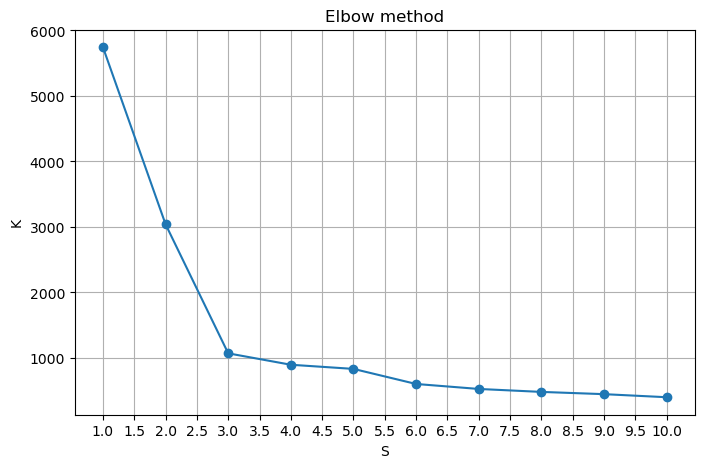

In [7]:
def elbow_method(X, K_list):
    
    k_num = len(K_list)
    S = np.zeros(k_num)
    i = 0
    # for each k finding SSE which is defined as the sum of the squared distances between each point and its assigned centroid
    for k in K_list:
        M, U = kmeans(X, k)
        err_matrix = np.sum((X[:, None] - M)**2, axis=2)
        error = np.sum(np.min(err_matrix, axis=1))
        S[i] = error
        i += 1
    
    plt.figure(figsize=(8, 5))
    plt.plot(K_list, S, marker='o')
    
    return S

K_list = range(1, 11)
elbow_method(X, K_list)
plt.grid(True)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.5))  
plt.title("Elbow method")
plt.xlabel("S")
plt.ylabel("K")
plt.show()

The elbow point is where the SSE sharply changes from a steep decline to a more gradual decline. We can easily see from the figure above that the elbow point is at k=3, therefore k=3 is the best value of k for the data.

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [9]:
data = pd.read_csv("sentiment.csv")
data.head(25)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [10]:
data.tail(10)

,PhraseId,SentenceId,Phrase,Sentiment
9990,9991,419,this a comedy or serious drama,2
9991,9992,419,a comedy or serious drama,2
9992,9993,419,a comedy or,2
9993,9994,419,a comedy,2
9994,9995,419,serious drama,2
9995,9996,420,plays like some corny television production fr...,1
9996,9997,420,plays like some corny television,1
9997,9998,420,like some corny television,2
9998,9999,420,some corny television,1
9999,10000,420,corny television,1


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    10000 non-null  int64 
 1   SentenceId  10000 non-null  int64 
 2   Phrase      10000 non-null  object
 3   Sentiment   10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB
None


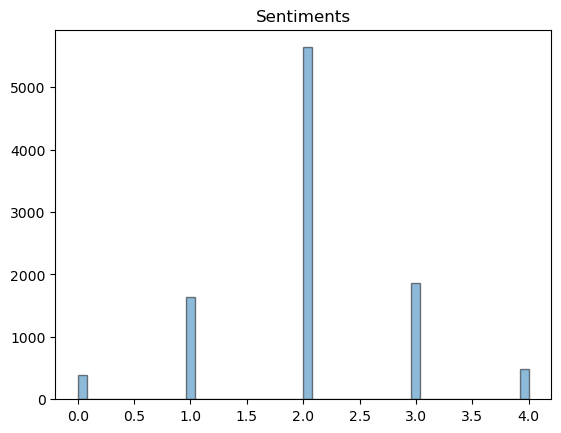

In [12]:
plt.hist(data['Sentiment'], bins=50, edgecolor='black', alpha=0.5)
plt.title('Sentiments')
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [13]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
def preprocess_text(text):
    
    # convert to lower case
    text = text.lower()
    # remove punctuation marks
    text = re.sub(r'[^\w\s]', '', text)
    # create a list of stop-words
    stop_words = set(stopwords.words('english'))
    # tokenization
    tokens = word_tokenize(text)
    # remove the stop words from tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]
    text = ' '.join(filtered_tokens)
    
    return text

In [15]:
# TODO: Apply the preprocessing function to the text column
data['Phrase'] = data['Phrase'].apply(preprocess_text)
data['Phrase']

0       series escapades demonstrating adage good goos...
1         series escapades demonstrating adage good goose
2                                                  series
3                                                        
4                                                  series
                              ...                        
9995    plays like corny television production bygone era
9996                          plays like corny television
9997                                like corny television
9998                                     corny television
9999                                     corny television
Name: Phrase, Length: 10000, dtype: object

### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears. This process is often referred to as vectorization.<br>
Step 1 :  Determine the Vocabulary : We first define our vocabulary, which is the set of all words found in our document set. Each word in this vocabulary becomes a feature.<br>
Step 2 :  Count : To vectorize our documents, all we have to do is count how many times each word appears.<br>
Step 3 : Vector Representation : Each entry in this vector corresponds to the count (or sometimes presence/absence) of a word from the vocabulary in the document.<br>
We can implement this technique, using CountVectorizer class.<br>
The CountVectorizer class allows you to create BoW vectors directly from text data without manually going through the tokenization and vectorization steps. The fit() method is used to learn the vocabulary from the data. It analyzes the text and constructs a vocabulary, assigning a unique index to each token (word) found in the text corpus. After learning the vocabulary, the transform() method is applied to convert text data into a matrix representation. It transforms the text into a numerical format representing the occurrence counts of words in each document. 
Then a method vector.get_feature_names_out() is called that gives a list of all unique words present in the corpus.

In [16]:
# TODO: Extract features from the preprocessed text data

vec = CountVectorizer()
features = vec.fit_transform(data['Phrase'])

# feature names(vocabulary)
feature_names = vec.get_feature_names_out()

print(features)
features_matrix = features.toarray()
print(features_matrix)

  (0, 1900)	1
  (0, 679)	1
  (0, 529)	1
  (0, 44)	1
  (0, 899)	2
  (0, 907)	1
  (0, 75)	1
  (0, 866)	1
  (0, 1449)	1
  (0, 90)	1
  (0, 1428)	1
  (0, 89)	1
  (0, 1387)	1
  (0, 2054)	1
  (1, 1900)	1
  (1, 679)	1
  (1, 529)	1
  (1, 44)	1
  (1, 899)	1
  (1, 907)	1
  (2, 1900)	1
  (4, 1900)	1
  (5, 679)	1
  (5, 529)	1
  (5, 44)	1
  :	:
  (9991, 1901)	1
  (9991, 382)	1
  (9991, 591)	1
  (9992, 382)	1
  (9993, 382)	1
  (9994, 1901)	1
  (9994, 591)	1
  (9995, 1574)	1
  (9995, 1214)	1
  (9995, 269)	1
  (9995, 675)	1
  (9995, 444)	1
  (9995, 1643)	1
  (9995, 2152)	1
  (9996, 1574)	1
  (9996, 1214)	1
  (9996, 444)	1
  (9996, 2152)	1
  (9997, 1214)	1
  (9997, 444)	1
  (9997, 2152)	1
  (9998, 444)	1
  (9998, 2152)	1
  (9999, 444)	1
  (9999, 2152)	1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [17]:
# TODO: Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(features, data['Sentiment'], test_size=0.2, random_state=30)

# TODO: Train a linear regression model

model = LinearRegression()
model.fit(x_train, y_train)

# TODO: Make predictions on the testing set

y_predict = model.predict(x_test)

# TODO: Evaluate the model using mean squared error
 
MSE = mean_squared_error(y_test, y_predict)
print(MSE)

0.3757984251647765


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

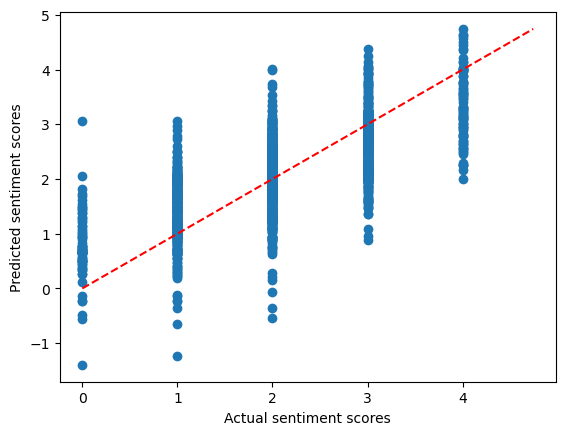

In [18]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual sentiment scores")
plt.ylabel("Predicted sentiment scores")
# plot the ideal line
max_val = max(max(y_test), max(y_predict))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')
plt.show()

## <font color="red"> Discuss the resulted figure </font>

The red line plotted above shows the ideal line y=x. It refers to the ideal situation where the predicted sentiment scores exactly match the actual scores. We can see that for an actual value of i, the predicted values are spread around i. For example for actual value of 1, the predicted values vary from about 0 to about 3. So the predictions are not too far way from the actual values, but they are not close to the actual values as well. Therefore linear regression is not an appropriate way for analyzing sentiment.

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [19]:
data['Phrase'] = data['Phrase'].apply(preprocess_text)
# create a dictionary of all the words
vocab = {}
preprocessed_texts = data['Phrase'].tolist()

for line in preprocessed_texts:
    words = line.split()
    for word in words:
        # remove one-letter words
        if len(word) > 1:  
            if word not in vocab:
                vocab[word] = len(vocab)


# initialize feature matrix with zeros
features_matrix2 = np.zeros((len(preprocessed_texts), len(vocab)))

# fill feature matrix with word occurrences
for i, line in enumerate(preprocessed_texts):
    words = line.split()
    for word in words:
        if word in vocab:
            word_idx = vocab[word]
            # count word occurrences
            features_matrix2[i][word_idx] += 1  

print(features_matrix2)
print(features_matrix2.shape)

norm1 = np.linalg.norm(features_matrix)
norm2 = np.linalg.norm(features_matrix2)
print("norm of features matrix using built-in functions: ", norm1)
print("norm of features matrix using our new method(without functions): ", norm2)
# therefore we can see that the two resulted matrices are totally equal

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(10000, 2445)
norm of features matrix using built-in functions:  183.08467986153292
norm of features matrix using our new method(without functions):  183.08467986153292
